# Explanatory Data Analysis
Here we will explore our data. It is important in this case, because we will based on it, when we will do preprocessing of our data and choose the model, which would cluster our data.

We will do next things:

1. Get main information from dataset:
    - Check data frame
    - Rename, if it's necessary
    - Look on info
    - Look on describe of our data
2. Looking at the relations between our features
    - Boxplot
    - Clustermap
    - Heatmap
3. Looking at the details of our data:
    - Histograms
    - Countplots(rating)
    - Boxplot(rating)

## Importing libraries

In [63]:
#importing main data analysis libraries
import pandas as pd
import numpy as np
#importing main visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline

#set visualization settings
large = 30; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (20, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

<ipython-input-63-eff869b06062>:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Getting main information

In [64]:
df = pd.read_csv('data.csv')

In [65]:
#as we can see most of the our features is named 'Category', so we should rename it, because it won't help us in our
#model building and exploring our data

df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [66]:
#rename the columns for easier and more visible use

#we need to drop this, because it's not necessery in our case, also it wouldn't help us to rename our features
#in addition we drop 'Unnamed: 25', because it's empty row, which don't carry any important information
df = df.drop(columns= ['User', 'Unnamed: 25'],axis = 1)

#names we get on the page of the dataset
names = [
    'churches', 'resorts', 'beaches', 'parks', 'theatres',
    'museums', 'malls', 'zoo', 'restaurants','pubs_bars',
    'local_services','burger_pizza', 'hotels','juice_bars',
    'art_galleries', 'dance_clubs', 'swimming_pools',
    'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points',
    'monuments','gardens'
]

#rename
df.columns = names

#check results
df.columns

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza', 'hotels', 'juice_bars', 'art_galleries', 'dance_clubs',
       'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes',
       'view_points', 'monuments', 'gardens'],
      dtype='object')

In [67]:
#as we can see most of our features is float, instead local_services
#so we should transform it into the float, because we don't want to lose informationb

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   churches        5456 non-null   float64
 1   resorts         5456 non-null   float64
 2   beaches         5456 non-null   float64
 3   parks           5456 non-null   float64
 4   theatres        5456 non-null   float64
 5   museums         5456 non-null   float64
 6   malls           5456 non-null   float64
 7   zoo             5456 non-null   float64
 8   restaurants     5456 non-null   float64
 9   pubs_bars       5456 non-null   float64
 10  local_services  5456 non-null   object 
 11  burger_pizza    5455 non-null   float64
 12  hotels          5456 non-null   float64
 13  juice_bars      5456 non-null   float64
 14  art_galleries   5456 non-null   float64
 15  dance_clubs     5456 non-null   float64
 16  swimming_pools  5456 non-null   float64
 17  gyms            5456 non-null   f

In [68]:
#so we have only one row with this, so it wouldn't be a problem to remove it, in my opinion it won't influence on our model

df[(df.local_services == '2\t2.')]

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
2712,1.71,1.68,1.46,1.13,1.12,1.15,1.26,1.17,1.59,0.85,...,5.0,1.08,1.1,1.04,5.0,4.43,5.0,5.0,5.0,2.57


In [69]:
df = df.drop(axis = 0, labels = 2712)
df['local_services'] = df.local_services.apply(float)

In [70]:
#let's check how much null values we have, so we have only two NaN values, we can drop it

df.isnull().sum()

churches          0
resorts           0
beaches           0
parks             0
theatres          0
museums           0
malls             0
zoo               0
restaurants       0
pubs_bars         0
local_services    0
burger_pizza      0
hotels            0
juice_bars        0
art_galleries     0
dance_clubs       0
swimming_pools    0
gyms              0
bakeries          0
beauty_spas       0
cafes             0
view_points       0
monuments         0
gardens           1
dtype: int64

In [71]:
df = df.dropna()

In [72]:
#we can see that distribution in our data is not the same in every feature, so we can handle with this

df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,...,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,...,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,...,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Getting main information: conclusion

So what can we say in conclusion:
1. We don't have a lot of NaN or missed values, so we don't have to get more information.
2. Our data is now ready for us to go to explanatory data analysis.

## Looking at the relations between our features

### Boxplot
This plot is needed, because we need to detect outliers, because it would be very important, when we will scale our data.

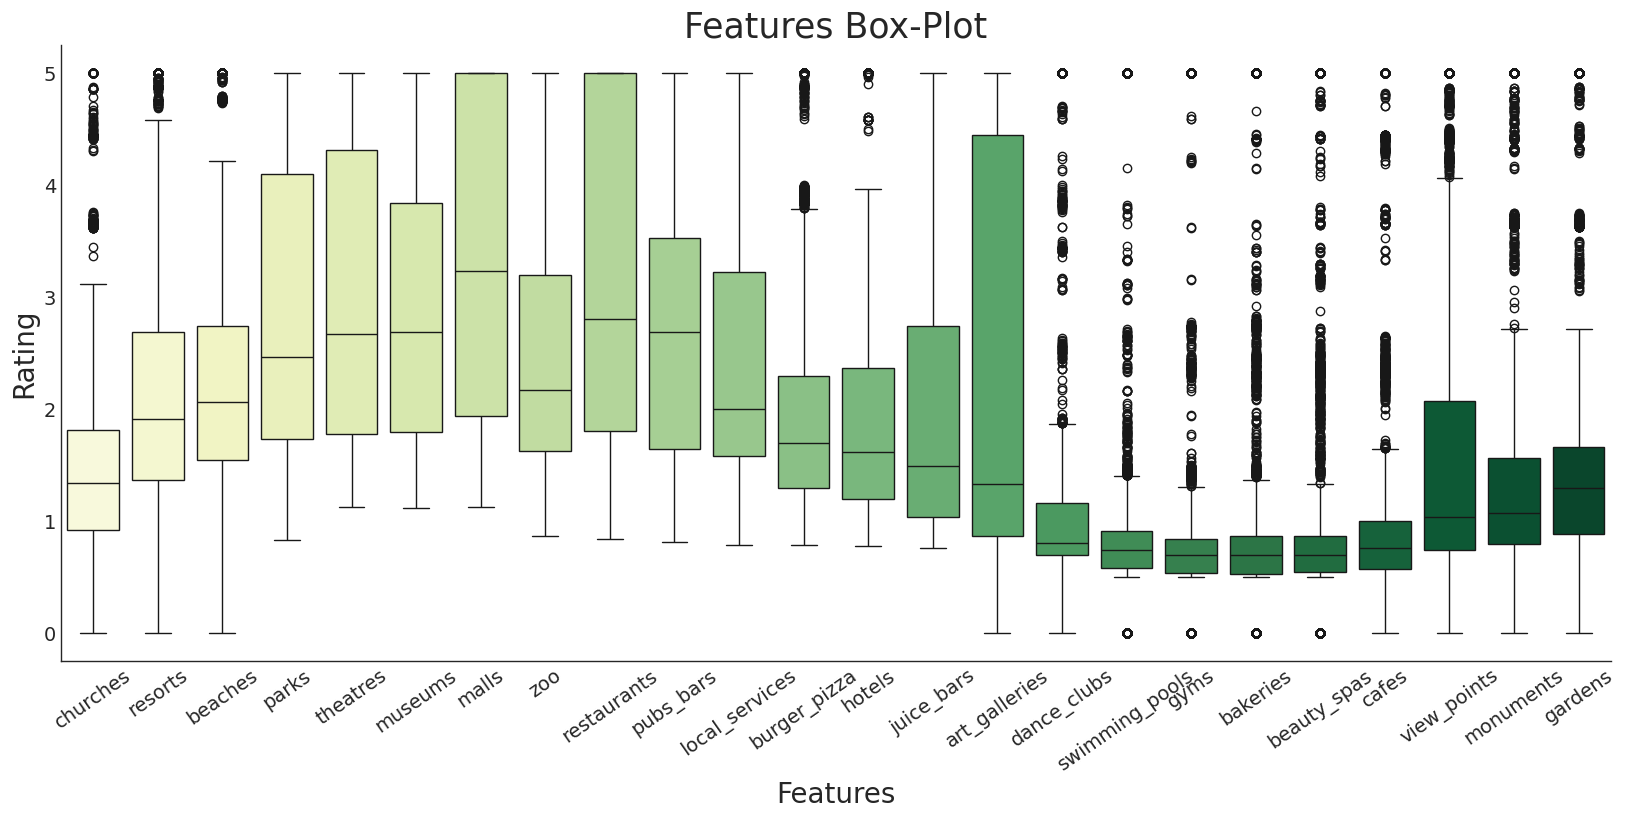

In [73]:
boxplot = plt.subplots(figsize=(20, 8))

boxplot = sns.boxplot(data= df, palette="YlGn")

sns.despine()
boxplot.set_xlabel('Features', fontsize = 20)
boxplot.set_ylabel('Rating', fontsize = 20)
boxplot.set_title('Features Box-Plot', fontsize = 25)

plt.xticks(rotation= 35)
plt.show()

### Boxplot: conclusion
As we can see we have a lot of outliers in some features. This may interfere with model building, as some of our models are very sensitive to it, such as k-means clustering. But we can't say where exactly we have problems, we will explore it later.

### Heatmap

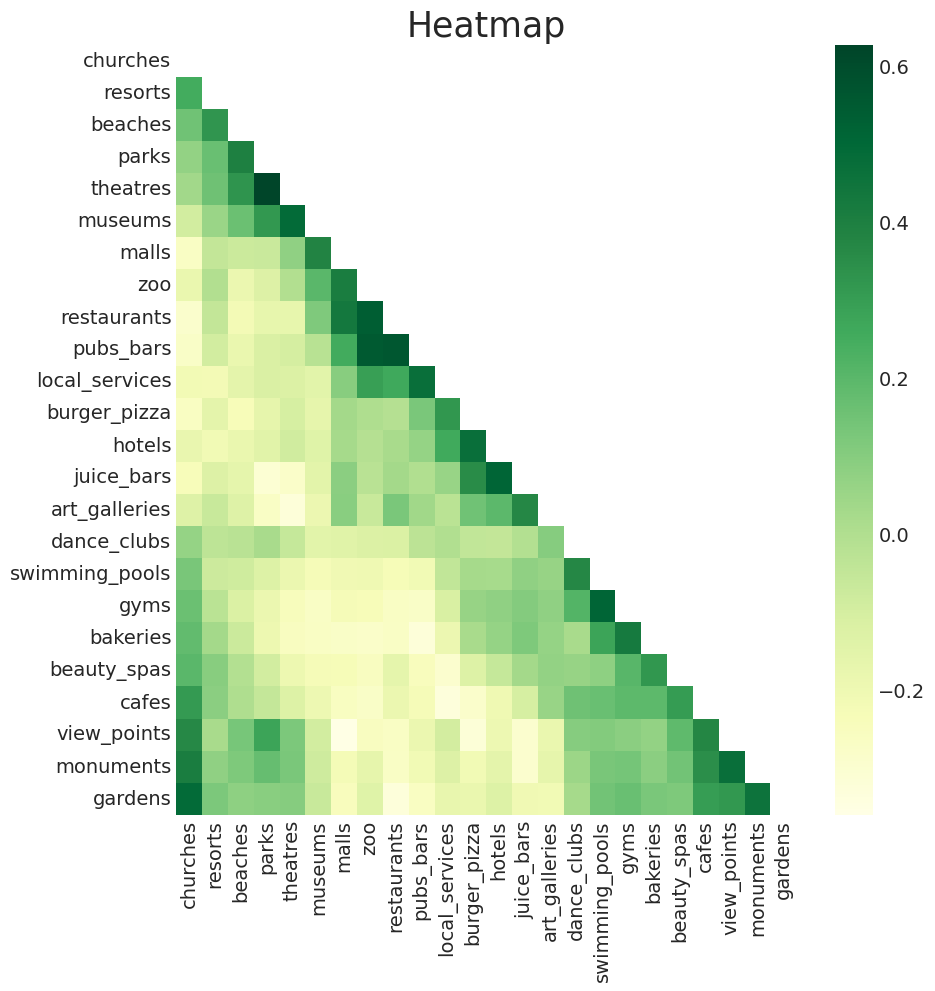

In [74]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, htmp = plt.subplots(figsize=(10, 10))
    htmp = sns.heatmap(corr, mask=mask, cmap = 'YlGn')

htmp.set_title('Heatmap', fontsize = 25)

plt.show()

### Heatmap: conclusion
This graph allows us to see that there are several distinct groups in our data that are closely related. It does not provide complete information, so we move on to clustermap.

### Clustermap

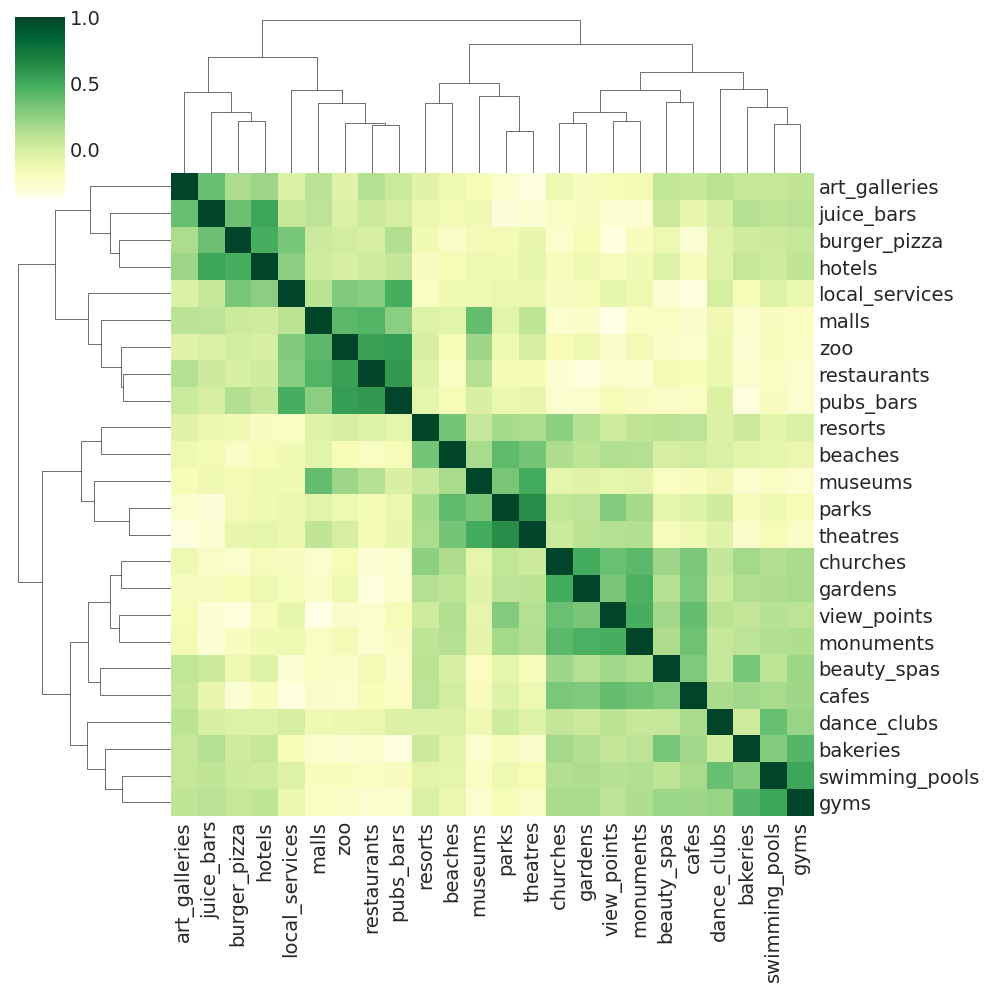

In [75]:
clustermap = sns.clustermap(df.corr(), cmap = 'YlGn')

plt.show()

### Clustermap: conclusion
Here we can make even more sure that our data is actually divided into groups. Unfortunately, this is shown to be too fragmented, but with this we will deal with this, finding the optimal number of necessary clusters.

## Looking at the relations between our features: conclusion
The conclusions of this part of our eda are as follows:
1. Our data has quite clearly defined parts to work with.
2. A large number of outliers may prevent us from building an efficient model, but this will be solved in the following part: data preprocessing.

## Looking at the details of our data

### Histograms
Here we will plot histograms for each feature. We need this before data preprocessing, because we need to scale them in a right way.

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


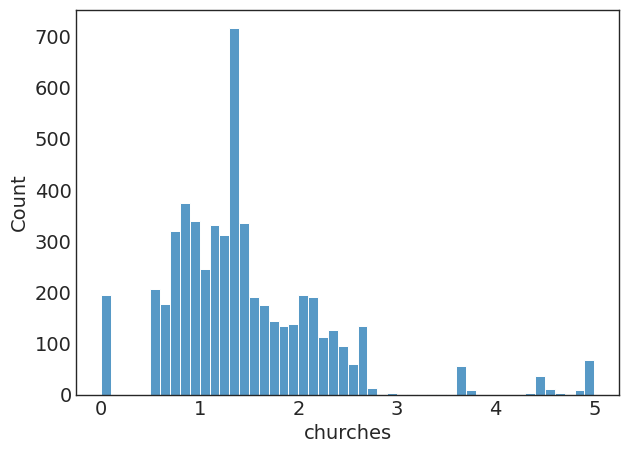

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


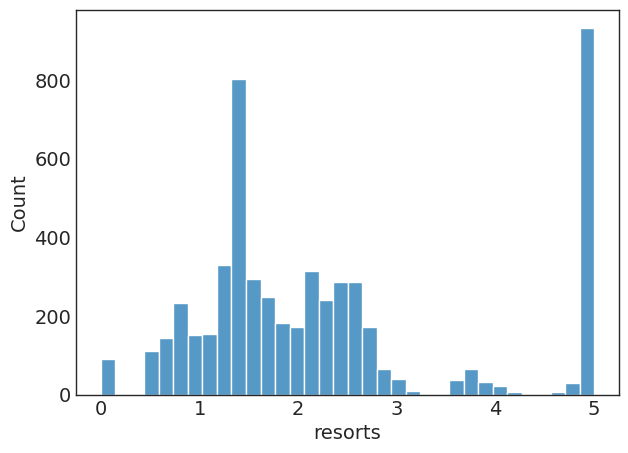

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


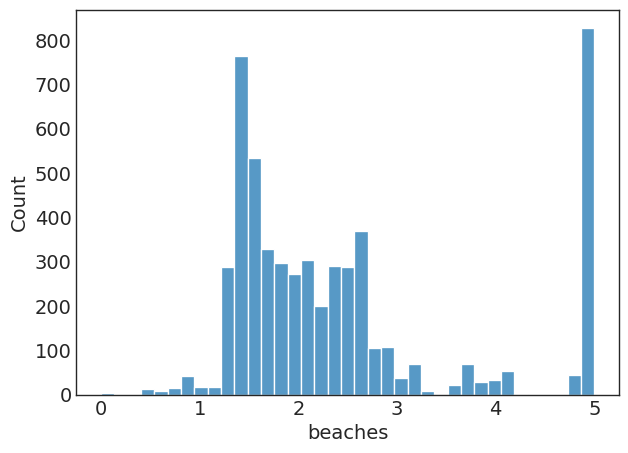

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


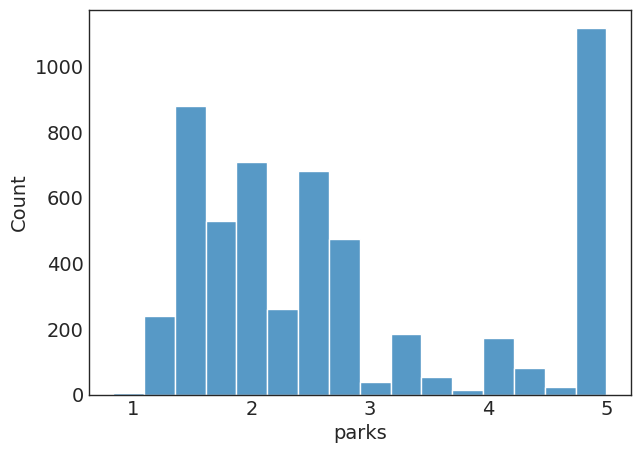

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


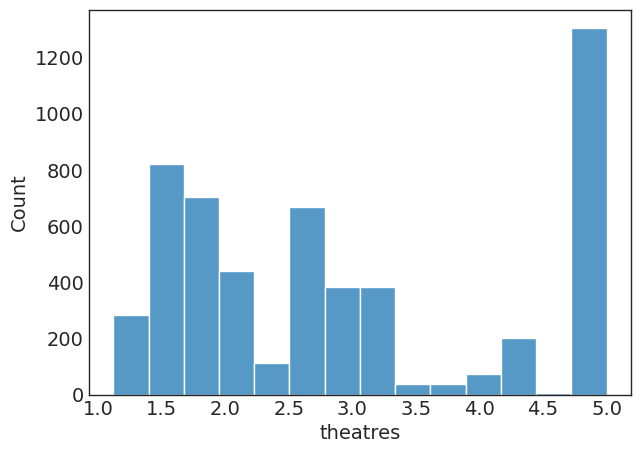

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


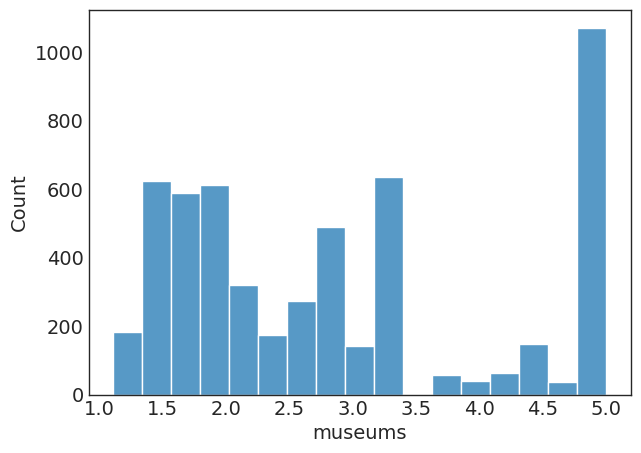

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


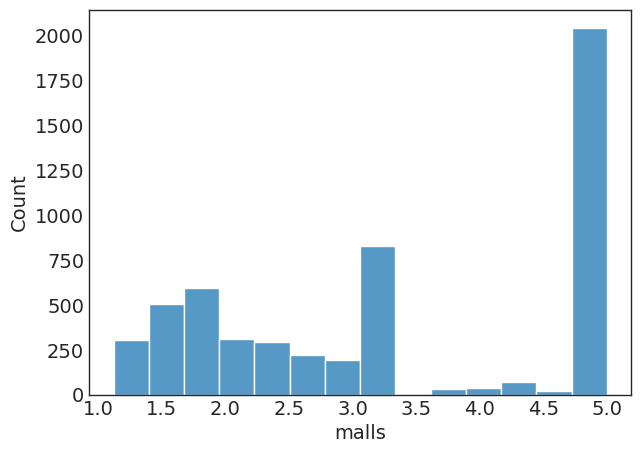

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


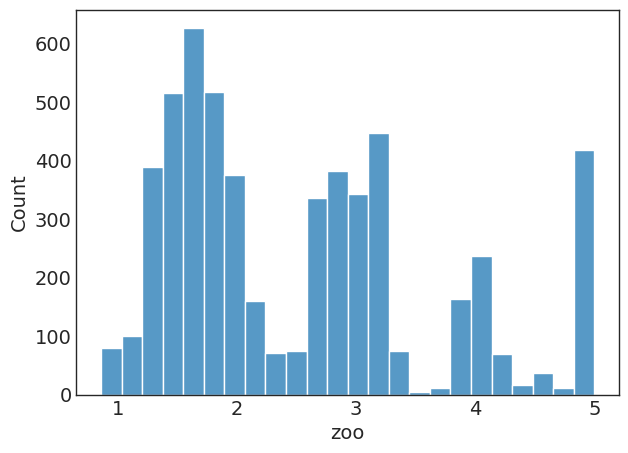

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


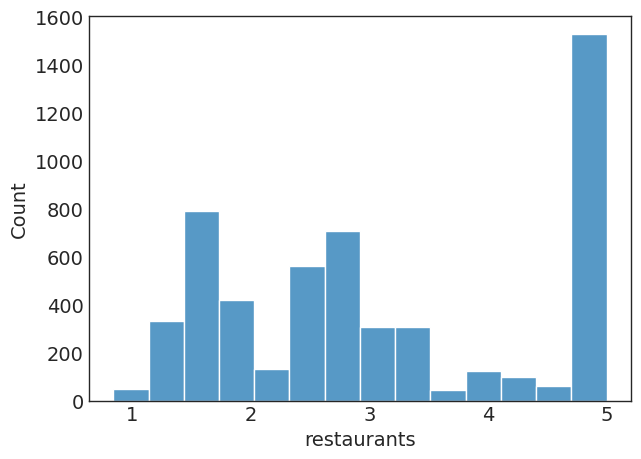

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


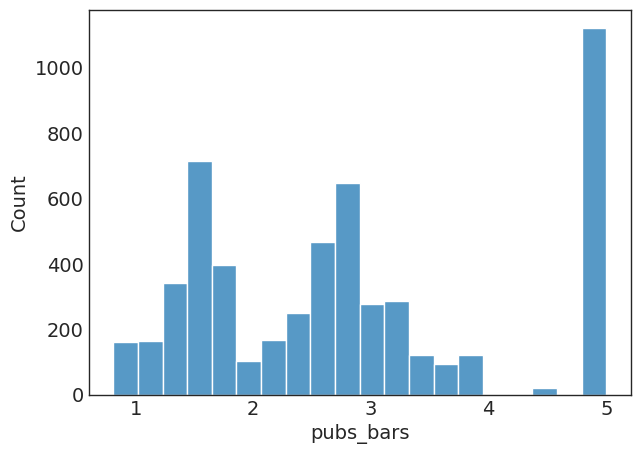

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


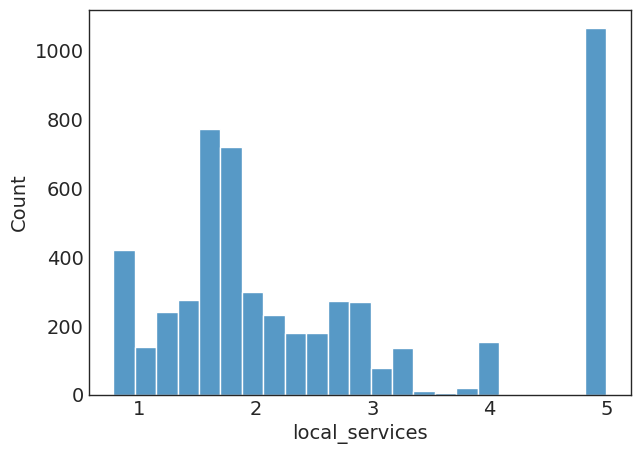

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


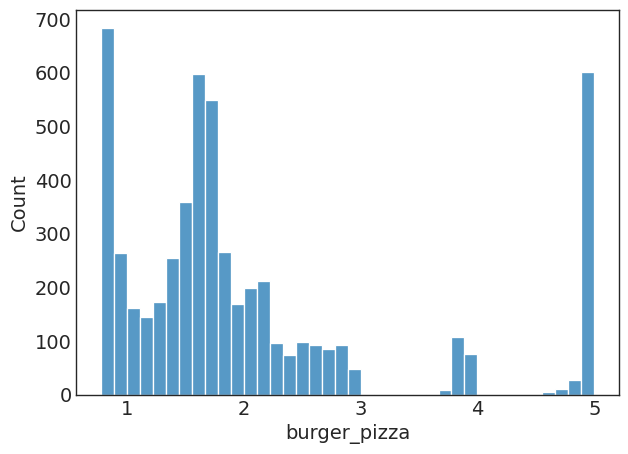

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


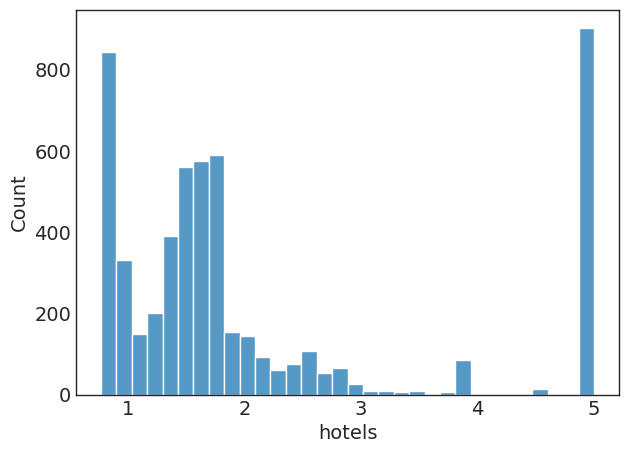

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


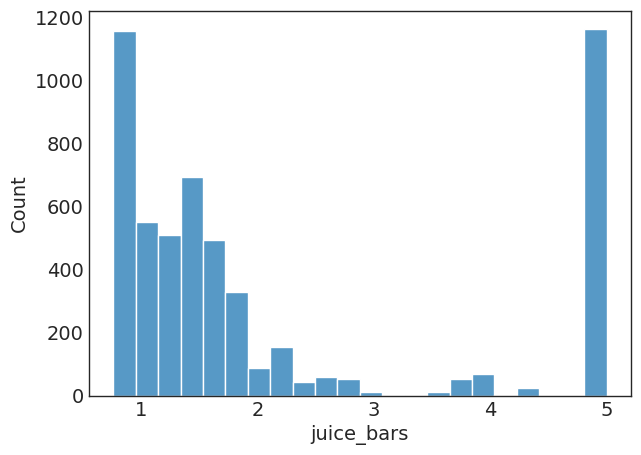

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


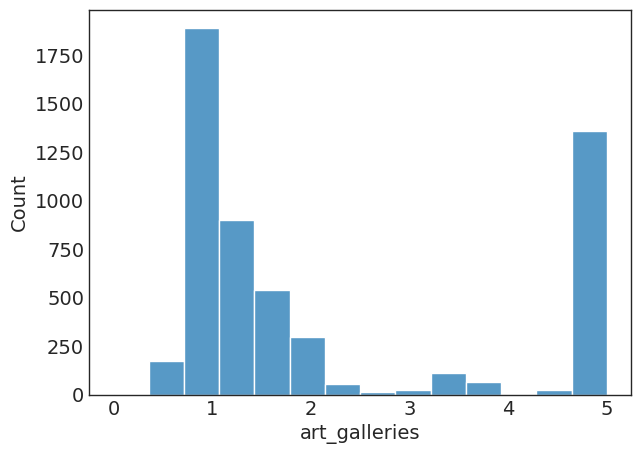

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


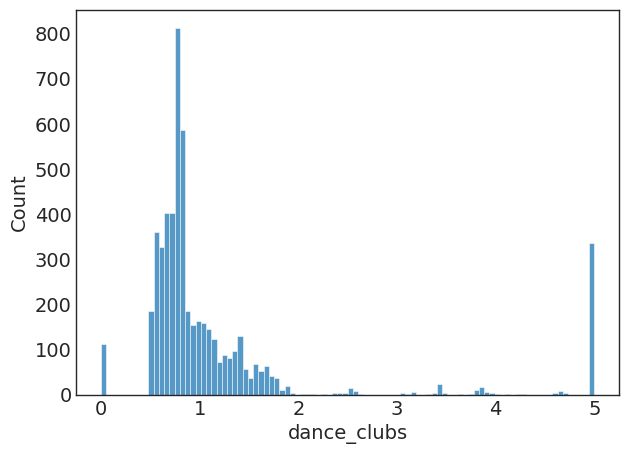

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


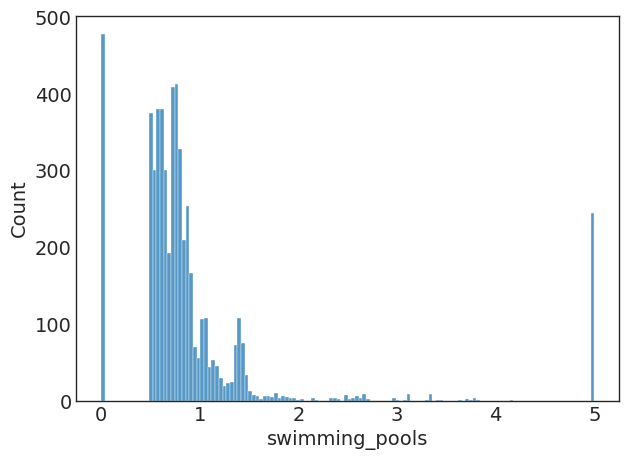

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


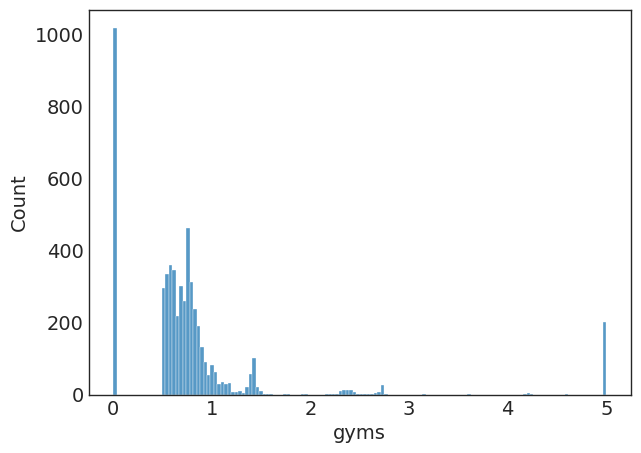

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


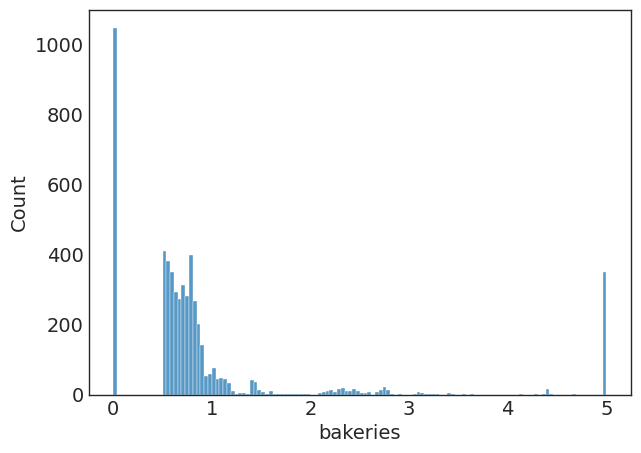

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


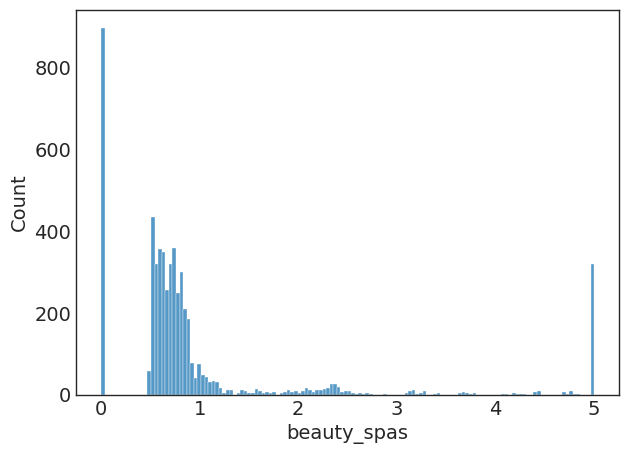

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


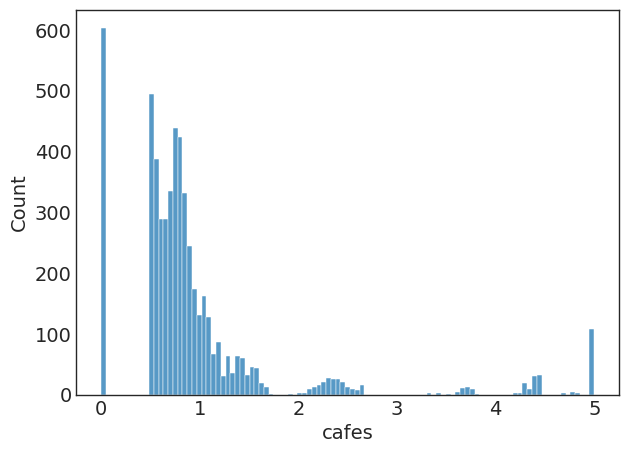

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


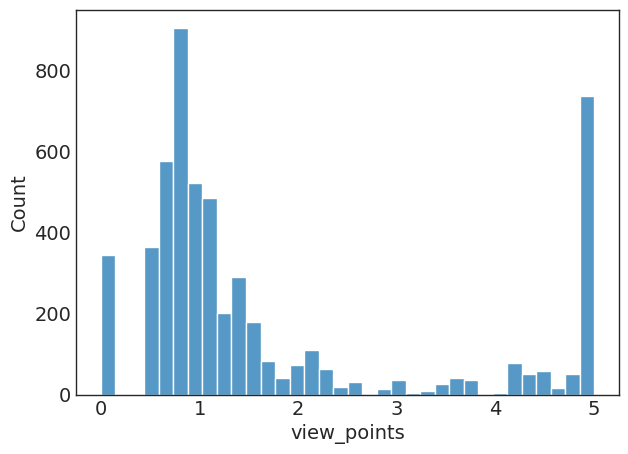

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


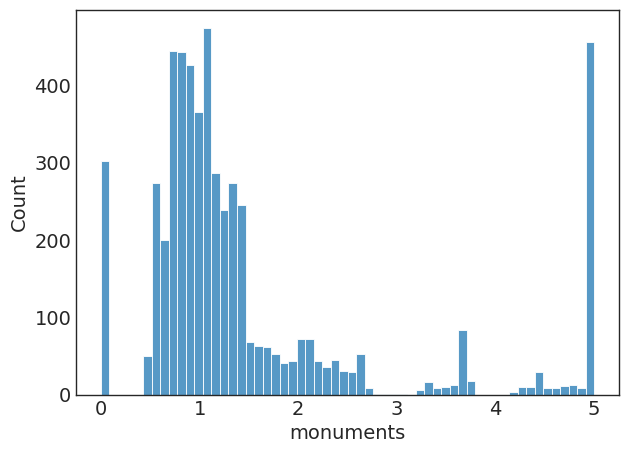

<ipython-input-76-cf88b41e4bd6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  his = sns.histplot(x=column, data=df, palette=["YlGn"])


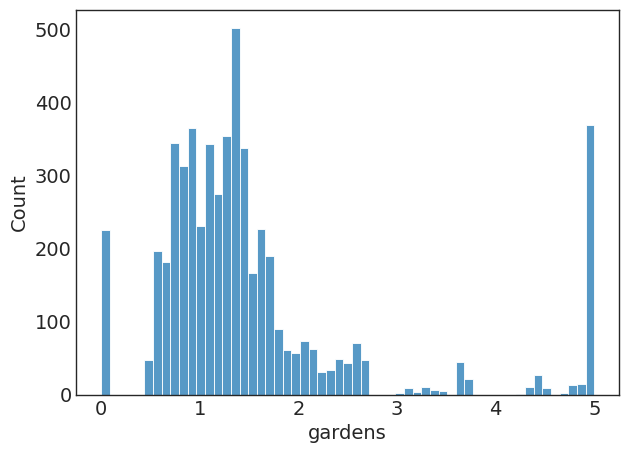

In [76]:
for column in df.columns:
    his = plt.subplots(figsize=(7, 5))
    his = sns.histplot(x=column, data=df, palette=["YlGn"])
    plt.show()

### Histogram: conclusion.
All these graphs were very useful to us, because they showed us how to prepare our data for the model. Some of these will require normalization, and another creation of quantiles. But some of them we should remove.

### Rating analysis.
In this part, we’re looking at the ratings as a whole. We’re going to bring all the classes together, and we’re going to look at, in general, how people rate places. No matter where they were.

In [77]:
#for all of this we should create new table - melted, it would help us in analysis
df_melted = pd.melt(df)

df_melted

,variable,value
0,churches,0.00
1,churches,0.00
2,churches,0.00
3,churches,0.00
4,churches,0.00
...,...,...
130891,gardens,1.56
130892,gardens,1.09
130893,gardens,1.11
130894,gardens,1.12


In [78]:
#everything was melt right, we didn't lost information, but only

df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130896 entries, 0 to 130895
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   variable  130896 non-null  object 
 1   value     130896 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


<ipython-input-79-1e9e1d2c240a>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot_rating = sns.histplot(data=df_melted,


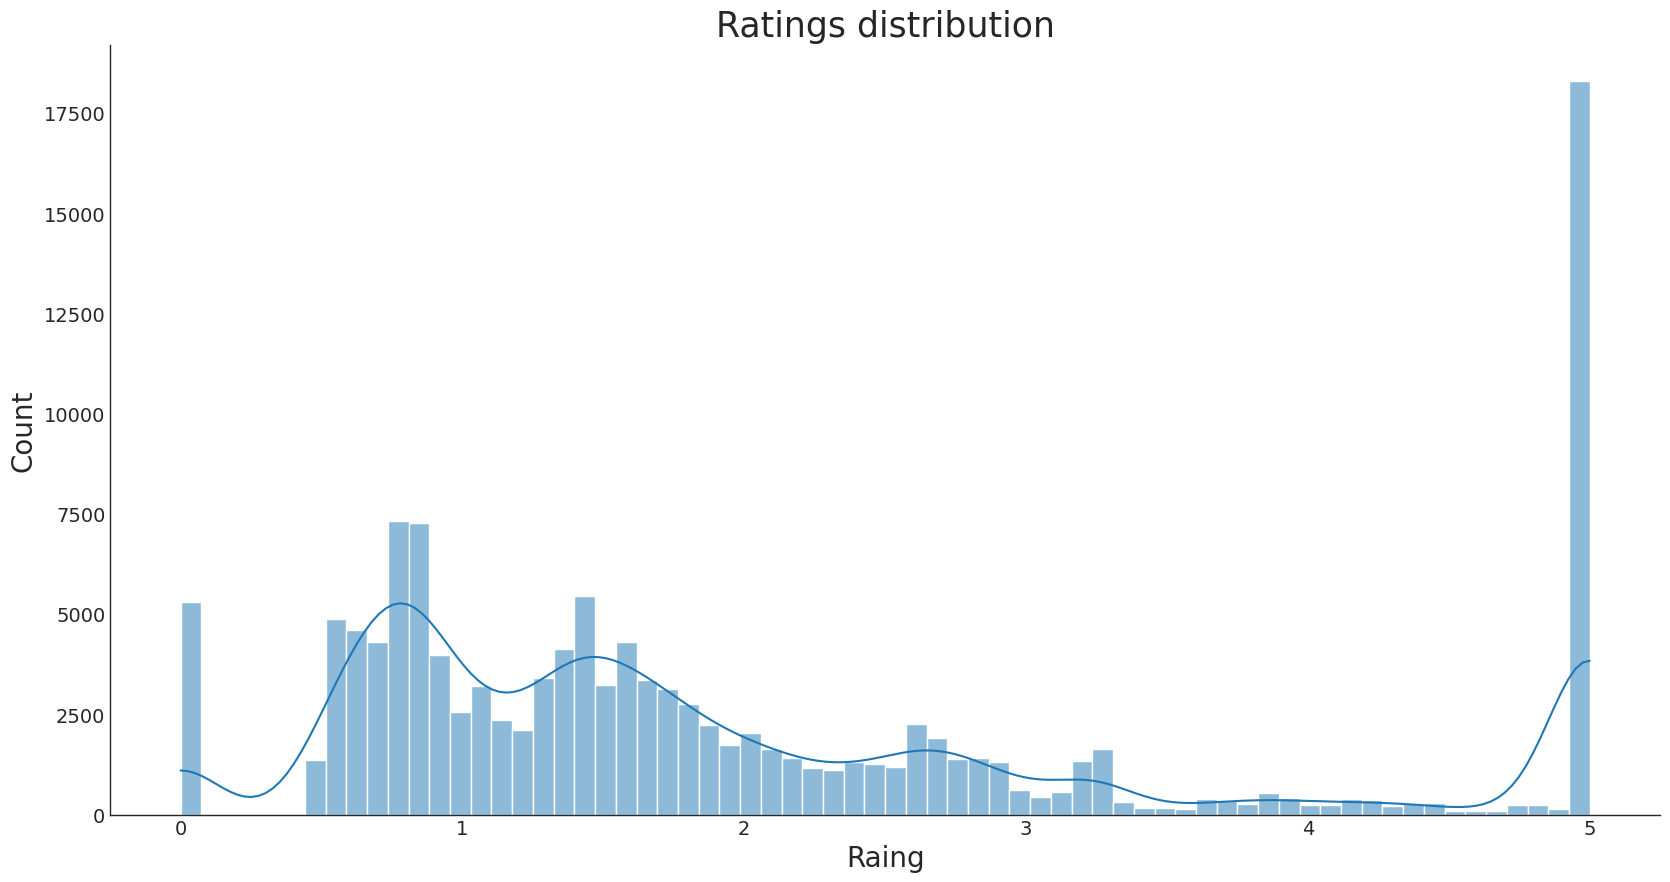

In [79]:
histplot_rating = sns.histplot(data=df_melted,
                               x='value',
                               palette="YlGn",
                               kde=True)

sns.despine()
histplot_rating.set_xlabel('Raing', fontsize = 20)
histplot_rating.set_ylabel('Count', fontsize = 20)
histplot_rating.set_title('Ratings distribution', fontsize = 25)

plt.show()

#This is interesting, we have too much outlier in two points: 0(about 5000) and 5(about 17 500)
#In my opinion it's true reviews, because people usually rate places, which they really like and don't rate, if they were
#disappointed

<ipython-input-80-c9a56e2b56c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot_rating = sns.boxplot(y = 'value', data = df_melted, palette= 'YlGn')


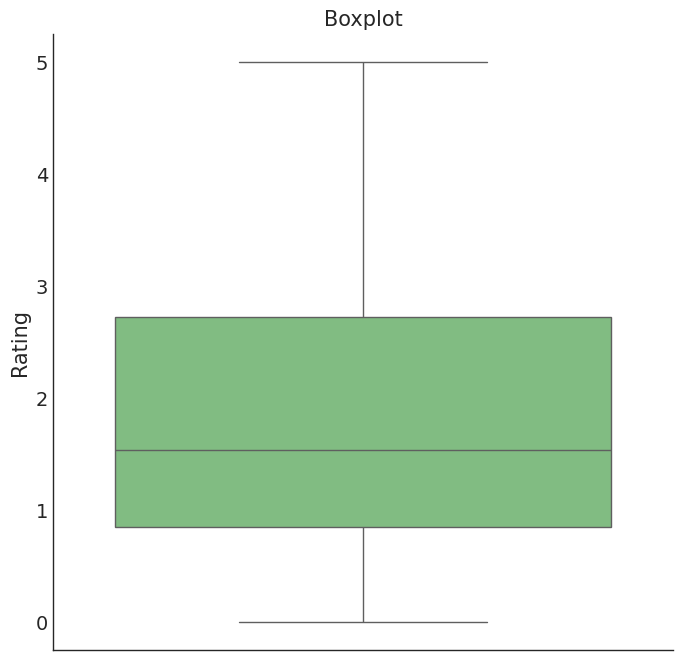

In [80]:
boxplot_rating = plt.subplots(figsize=(8, 8))

boxplot_rating = sns.boxplot(y = 'value', data = df_melted, palette= 'YlGn')

sns.despine()
boxplot_rating.set_ylabel('Rating', fontsize = 15)
boxplot_rating.set_title('Boxplot', fontsize = 15)

plt.show()

#as we can see our values don't have big outliers, maybe in some features we will drop them,
#иut the overall picture is not so disappointing

## Looking at the details of our data: conclusion
Looking at our data in more detail, we can say the following:
1. Most features distribution tends to Gaussian
2. Overall rating distributed closely to normal

# Conclusion
As a result of this phase, we have prepared almost everything for data preprocessing, including we have already removed the missing values, renamed the columns, led to the same view.

In addition, we looked at how the values of our features are distributed, the estimated number of clusters, the relationships, and so on, what’s important in the next phase.